# **MILESTONE 1**

___
Nama  		: Rafi Arya Siregar

Batch 		: HCK-028

Obyektif	: Melakukan analisis 
___

___
# **LATAR BELAKANG STUDY CASE**
Dalam rangka mendukung operasional dan mobilitas instansi, pengadaan kendaraan dinas merupakan salah satu aspek penting yang perlu dipertimbangkan secara strategis. Pengadaan ini tidak hanya harus memenuhi kebutuhan fungsi dan efisiensi kendaraan selama masa pakai, tetapi juga mempertimbangkan nilai ekonomis jangka panjang, termasuk potensi depresiasi harga jual kembali setelah masa pemakaian berakhir.

Dengan meningkatnya kesadaran terhadap efisiensi energi dan keberlanjutan lingkungan, jenis kendaraan seperti diesel, hybrid, dan listrik mulai menjadi pilihan strategis yang dipertimbangkan dalam pengadaan armada. Masing-masing jenis kendaraan memiliki kelebihan dan kekurangan baik dari segi operasional, perawatan, efisiensi bahan bakar/listrik, maupun nilai jual kembali (resale value).

Dalam konteks ini, saya sebagai seorang Data Scientist diberi tanggung jawab untuk melakukan analisis dan rekomendasi pemilihan 5 unit mobil dinas dengan komposisi:

- 3 unit mobil diesel
- 1 unit mobil hybrid
- 1 unit mobil listrik

Tujuan utama dari studi ini adalah memastikan bahwa kelima mobil tersebut tidak hanya sesuai dengan kebutuhan operasional selama 3 tahun masa pakai, namun juga memiliki nilai depresiasi harga yang minimal, sehingga potensi kerugian nilai aset dapat ditekan serendah mungkin saat kendaraan dijual kembali. Menggunakan metode SMART, saya dapat mengelola proyek ini agar berjalan dengan terarah. Berikut penjabaran SMART. 
___

Saya merupakan seorang data scientist yang ditugaskan untuk mengidentifikasi mobil dinas yang sebanyak 5 unit dengan tipe yang bebas, namun dengan syarat 3 mobil diesel, 1 hybrid, dan 1 listrik. Mobil akan digunakan selama 3 tahun, maka dari itu coba cari mobil yang kalau dijual kembali tidak terlalu mengalami depresiasi harga. Saya diberi waktu sekitar seminggu untuk menganalisa

## **SMART FRAMEWORK**

**PROBLEM STATEMENT**:
Bagaimana cara memilih 5 unit mobil dinas dengan komposisi 3 unit diesel, 1 unit hybrid, dan 1 unit listrik, yang memiliki performa baik untuk penggunaan selama 3 tahun dan mengalami depresiasi harga yang relatif rendah saat dijual kembali?

- **Specific**: Mengelola sebuah showroom mobil bekas dengan melihat pola penjualan dari segi harga, segmentasi tahun, atribut mobil, dan performa mobil.
- **Measure**: Memiliki penghasilan sebesar +/- Rp3,000,000,000,- selama 5 tahun, dengan pendapatan per bulan sebesar +/= Rp50,000,000,-. Jika dikonversi nilai mata uang poundsterling, maka sekitar 2277,72 POUNDSTERLING PER BULAN
- **Achievable**: Bekerja sama dengan komunitas lokal pada setiap wilayah di UK dengan target menambah potensi pelanngan sekitar 1-2 orang perbulan. 
- **Relevant**: Melakukan analisa produk seblak dari segi harga, rating produk, penjualan produk, dan kota penjualan pada platform Tokopedia agar dapat menambah penghasilan sebagai seorang dropshipper.
- **Time Bound**: Menganalisa dan mengevaluasi data selama dua bulan untuk mengukur performa penjualan berdasarkan data mobil bekas.
___
## **PENJABARAN MASALAH**

Berdasarkan *problem statment* di atas, terdapat enam poin permasalahan yang saya angkat:

1. Apa: Jenis mobil yang mengalami penurunan harga terbesar (visualisasi)
2. Kapan: Kapan penjualan terbaik agar menghindari depresiasi harga mobil yang berlebih? (visualisasi)
3. Berapa: Potensi keuntungan mobil dan maksimum dari setiap series mobil? (deskriptif: confidence interval)
4. Bagaimana: Hubungan antara mobil dengan umur 20 tahun tahun dengan 10 tahun berdasarkan harganya? 
5. Rata-rata harga mobil per jenis model. 
6. Dimana: 

1. Apa: Tipe mobil BMW yang paling laku dijual (visualisasi)
2. Berapa: Rentang mileage mobil EV, Hybrid, dan Non-EV (visualisasi)
3. Siapa: Model mobil BMW mana yang paling banyak tersedia dalam dataset berdasarkan kategori harga?
4. Kenapa: Apakah ada perbedaan harga jual antara ev, hybrid, dan non ev? (inferensial)
5. Dimana: Rentang harga penjualan BMW per tipe? (visualisasi)
6. Bagaimana: Kecenderungan antara tipe mobil dengan harga tax (deskriptif)


In [268]:
# Melakukan import library dan package yang akan digunakan

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# Membaca file csv
# Menggunakan parameter skipinitialspace untuk menghapus spasi setelah koma.
df = pd.read_csv('bmw.csv', skipinitialspace = True).reset_index(drop=True)
df.columns = df.columns.str.strip()

In [270]:
df['transmission'].value_counts()

transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [272]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [273]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10776    False
10777    False
10778    False
10779    False
10780    False
Length: 10781, dtype: bool

In [274]:
a = df.groupby('model')['year'].first().reset_index()
a

,model,year
0,1 Series,2017
1,2 Series,2018
2,3 Series,2017
3,4 Series,2017
4,5 Series,2014
5,6 Series,2018
6,7 Series,2014
7,8 Series,2019
8,M2,2016
9,M3,2017


In [275]:
df['fuelType'].value_counts()

fuelType
Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: count, dtype: int64

In [276]:
ev = df[df['fuelType'].isin(['Electric','Hybrid'])]

ev

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
170,2 Series,2020,25998,Automatic,3160,Hybrid,140,113.0,1.5
228,X5,2016,34498,Automatic,17303,Hybrid,0,85.6,2.0
252,3 Series,2016,16998,Semi-Auto,43695,Hybrid,0,134.5,2.0
413,i8,2016,48998,Automatic,10087,Hybrid,0,134.5,1.5
518,3 Series,2017,18298,Semi-Auto,33384,Hybrid,0,134.5,2.0
...,...,...,...,...,...,...,...,...,...
9929,7 Series,2019,49000,Automatic,2000,Hybrid,135,113.0,2.0
10033,5 Series,2018,26790,Automatic,20000,Hybrid,140,156.9,2.0
10034,5 Series,2017,23880,Automatic,6002,Hybrid,140,156.9,2.0
10051,X5,2019,65000,Automatic,7374,Hybrid,140,188.3,3.0


In [277]:
def find_duplicates(data):
    seen = set()
    duplicates = []
    for item in data:
        if item in seen:
            duplicates.append(item)
        else:
            seen.add(item)
    return duplicates

tahun = df['year']
duplicate_values = find_duplicates(tahun)
print(f"Duplicate values: {duplicate_values}")

a = df.nunique()
a

Duplicate values: [2014, 2016, 2017, 2018, 2017, 2016, 2017, 2017, 2016, 2017, 2017, 2017, 2017, 2017, 2014, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2017, 2017, 2016, 2017, 2017, 2017, 2015, 2016, 2017, 2018, 2016, 2016, 2018, 2017, 2016, 2017, 2016, 2016, 2017, 2016, 2014, 2017, 2017, 2014, 2017, 2017, 2016, 2018, 2015, 2017, 2017, 2013, 2017, 2016, 2016, 2016, 2017, 2016, 2016, 2016, 2018, 2017, 2016, 2016, 2017, 2014, 2016, 2014, 2017, 2016, 2017, 2017, 2017, 2017, 2016, 2017, 2016, 2018, 2015, 2017, 2014, 2017, 2016, 2017, 2015, 2017, 2015, 2017, 2016, 2016, 2016, 2017, 2017, 2015, 2016, 2015, 2016, 2016, 2015, 2017, 2016, 2016, 2017, 2016, 2013, 2017, 2016, 2016, 2017, 2018, 2017, 2016, 2018, 2016, 2018, 2017, 2017, 2015, 2017, 2016, 2017, 2017, 2017, 2016, 2017, 2016, 2016, 2017, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2016, 2014, 2016, 2018, 2018, 2013, 2017, 2016, 2017, 2017, 2017, 2017, 2017, 2015, 2018, 2016, 2016, 2016, 2017, 2015, 2020, 2020, 2014, 2020, 202

model             24
year              25
price           3777
transmission       3
mileage         8086
fuelType           5
tax               38
mpg              102
engineSize        17
dtype: int64

Tidak terdapat nilai null pada dataset. Nilai duplicated merujuk pada value categorical seperti jenis model dan tahun keluaran mobil yang sama. Bisa di lihat [disini.](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data?select=bmw.csv)

In [278]:
# df = df.dropna(subset=df.columns[3:8], how='any')
# df.info()

df['model'].unique()

array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series',
       '4 Series', 'X3', '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2',
       'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3'],
      dtype=object)

___

## **1. Dimana rentang harga penjualan BMW per tipe dan tahun keluaran?**
___

In [292]:
df['tahun'] = df['year'].astype(int)

5 Kombinasi model dan tahun produksi teratas:
['3 Series 2019', '2 Series 2019', '1 Series 2019', '1 Series 2016', '1 Series 2017']


C:\Users\rafiu\AppData\Local\Temp\ipykernel_22468\1780434374.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model_tahun', y='price', data=df_top5, ci=None, color='skyblue')


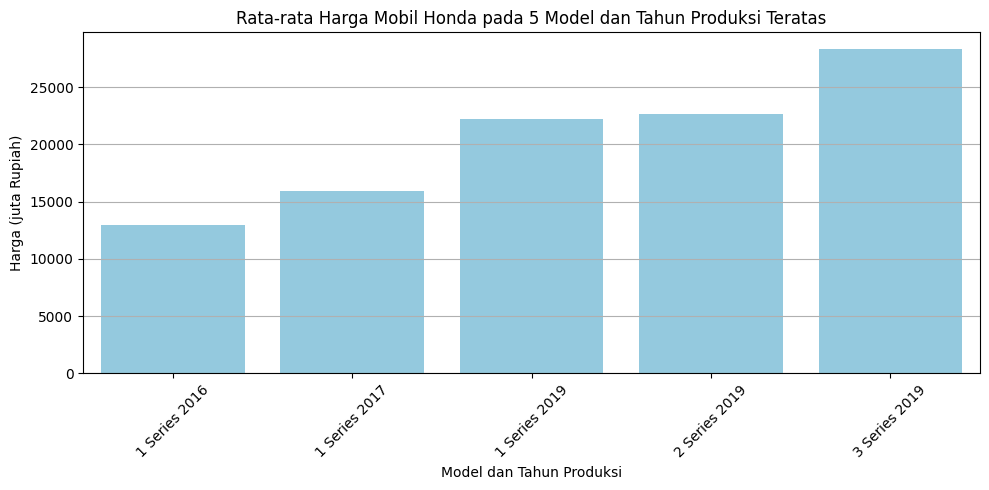

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi df punya kolom 'model', 'tahun', dan 'price' (harga)
# Buat kolom gabungan model + tahun
df['model_tahun'] = df['model'] + ' ' + df['tahun'].astype(str)

# Hitung frekuensi kemunculan tiap model_tahun
freq = df['model_tahun'].value_counts()

# Ambil 5 teratas
top5_model_tahun = freq.head(5).index.tolist()

# Filter dataset hanya yang termasuk top 5
df_top5 = df[df['model_tahun'].isin(top5_model_tahun)]

print("5 Kombinasi model dan tahun produksi teratas:")
print(top5_model_tahun)
plt.figure(figsize=(10,5))
sns.barplot(x='model_tahun', y='price', data=df_top5, ci=None, color='skyblue')
plt.title('Rata-rata Harga Mobil Honda pada 5 Model dan Tahun Produksi Teratas')
plt.xlabel('Model dan Tahun Produksi')
plt.ylabel('Harga (juta Rupiah)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## **2. Rentang mileage mobil EV, Hybrid, dan Non-EV?**
___

C:\Users\rafiu\AppData\Local\Temp\ipykernel_22468\4200824000.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats = stats[df['fuelType'] != 'Other']


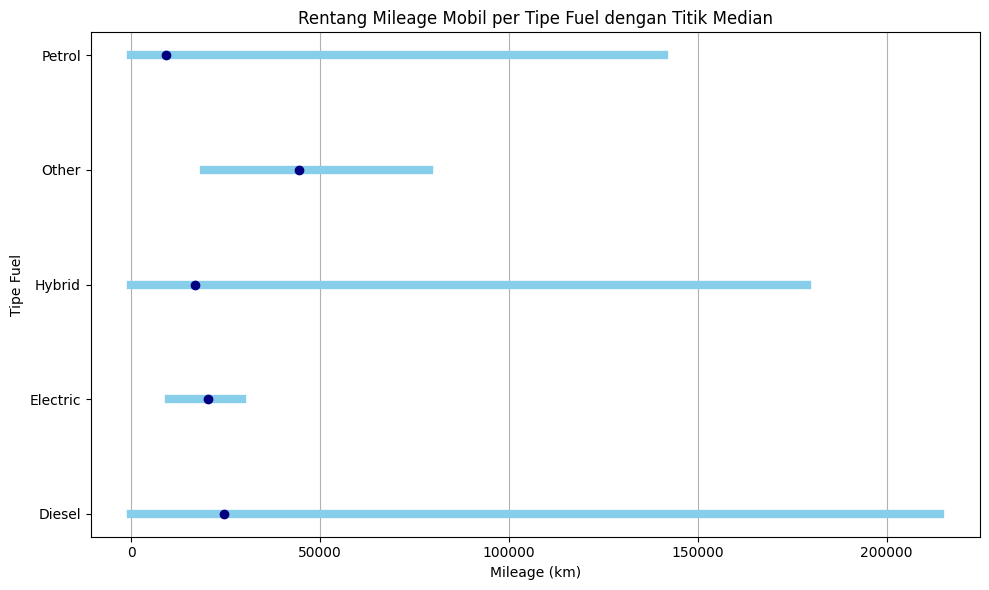

In [319]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung statistik min, median, max mileage per tipe
stats = df.groupby('fuelType')['mileage'].agg(['min', 'median', 'max']).reset_index()
stats = stats[df['fuelType'] != 'Other']
plt.figure(figsize=(10,6))

for i, row in stats.iterrows():
    # Garis horizontal (range min-max)
    plt.plot([row['min'], row['max']], [row['fuelType'], row['fuelType']], color='skyblue', linewidth=6)
    # Titik median
    plt.plot(row['median'], row['fuelType'], 'o', color='navy')

plt.xlabel('Mileage (km)')
plt.ylabel('Tipe Fuel')
plt.title('Rentang Mileage Mobil per Tipe Fuel dengan Titik Median')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## **3. Model mobil BMW mana yang paling banyak tersedia dalam dataset berdasarkan kategori harga**
___

C:\Users\rafiu\AppData\Local\Temp\ipykernel_22468\3874853415.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['kategori_harga', 'model_tahun']).size().reset_index(name='jumlah')
C:\Users\rafiu\AppData\Local\Temp\ipykernel_22468\3874853415.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df.groupby('kategori_harga')
C:\Users\rafiu\AppData\Local\Temp\ipykernel_22468\3874853415.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operati

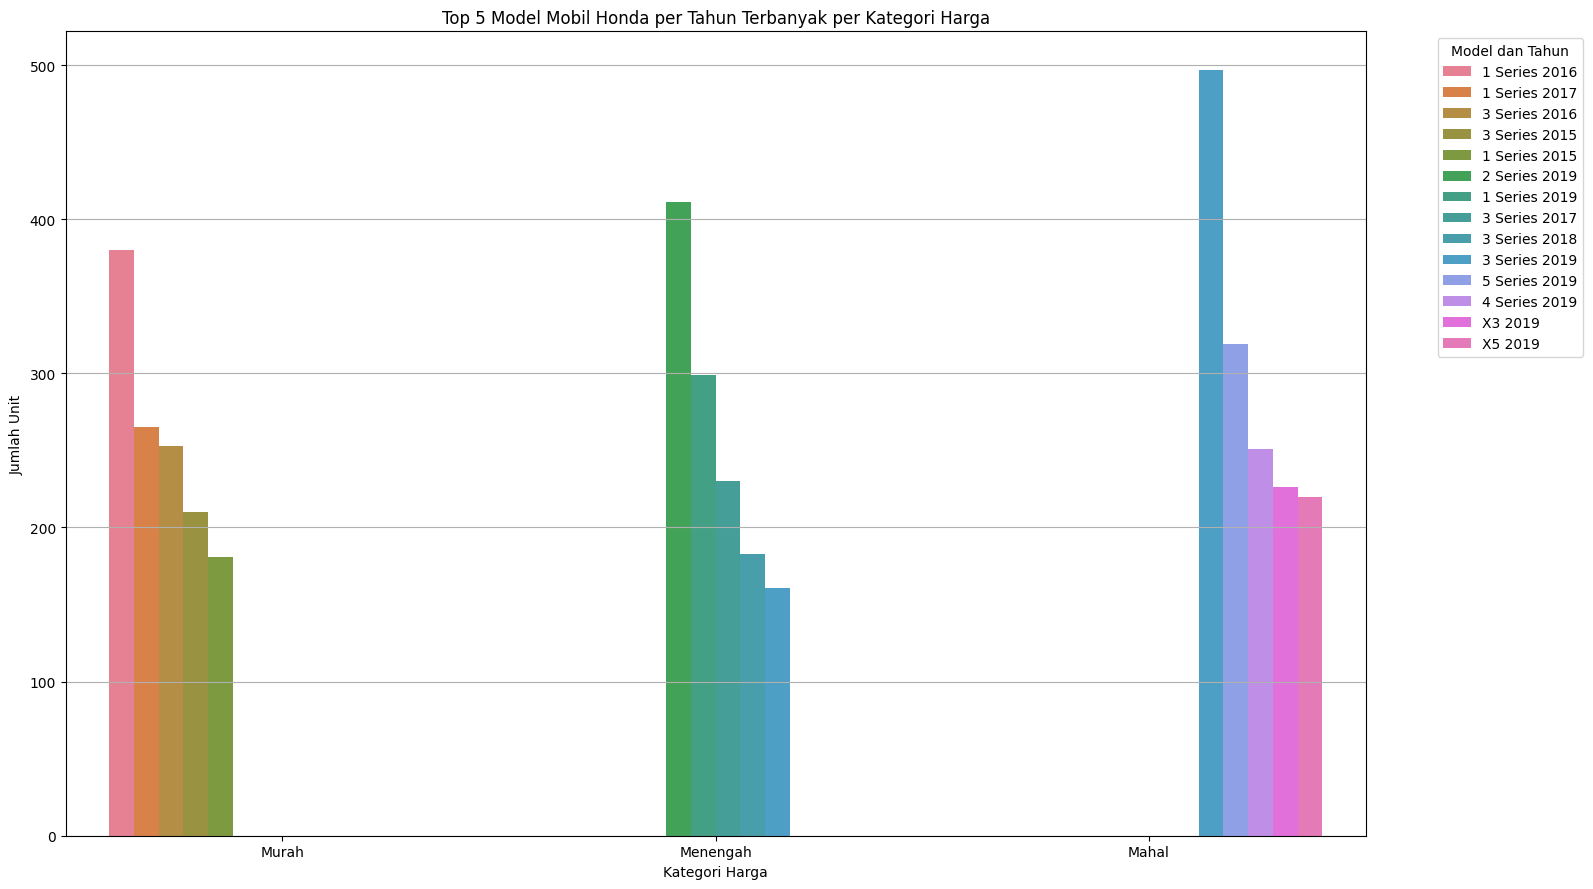

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data
# df = pd.read_csv('data_mobil_honda.csv')  # sesuaikan dengan datamu

# Buat kolom gabungan model + tahun produksi, misal "CR-V 2015"
df['model_tahun'] = df['model'] + ' ' + df['tahun'].astype(str)

# Buat kategori harga otomatis berdasarkan kuantil (3 kategori)
df['kategori_harga'] = pd.qcut(df['price'], q=3, labels=['Murah', 'Menengah', 'Mahal'])

# Hitung jumlah unit per model_tahun per kategori harga
count_df = df.groupby(['kategori_harga', 'model_tahun']).size().reset_index(name='jumlah')

# Ambil top 5 model_tahun terbanyak per kategori harga
top_models_per_category = (
    count_df.groupby('kategori_harga')
    .apply(lambda x: x.nlargest(5, 'jumlah'))
    .reset_index(drop=True)
)

# Visualisasi
plt.figure(figsize=(16,9))
sns.barplot(data=top_models_per_category, x='kategori_harga', y='jumlah', hue='model_tahun')

plt.title('Top 5 Model Mobil Honda per Tahun Terbanyak per Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Unit')
plt.legend(title='Model dan Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# **4. Rentang harga penjualan BMW per tipe? (visualisasi)**

         model  year  price transmission  mileage fuelType  tax   mpg  \
8697  1 Series  2001  13000       Manual    22633   Petrol  125  53.3   
7358  1 Series  2004   2495       Manual   112000   Diesel  200  49.6   
9321  1 Series  2005   3795    Automatic    63547   Diesel  265  42.8   
9248  1 Series  2006   2990       Manual    88000   Petrol  260  37.7   
9678  1 Series  2006   2995       Manual    90000   Diesel  200  49.6   

      engineSize  tahun    model_tahun kategori_harga  
8697         0.0   2001  1 Series 2001          Murah  
7358         2.0   2004  1 Series 2004          Murah  
9321         2.0   2005  1 Series 2005          Murah  
9248         1.6   2006  1 Series 2006          Murah  
9678         2.0   2006  1 Series 2006          Murah  
count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64


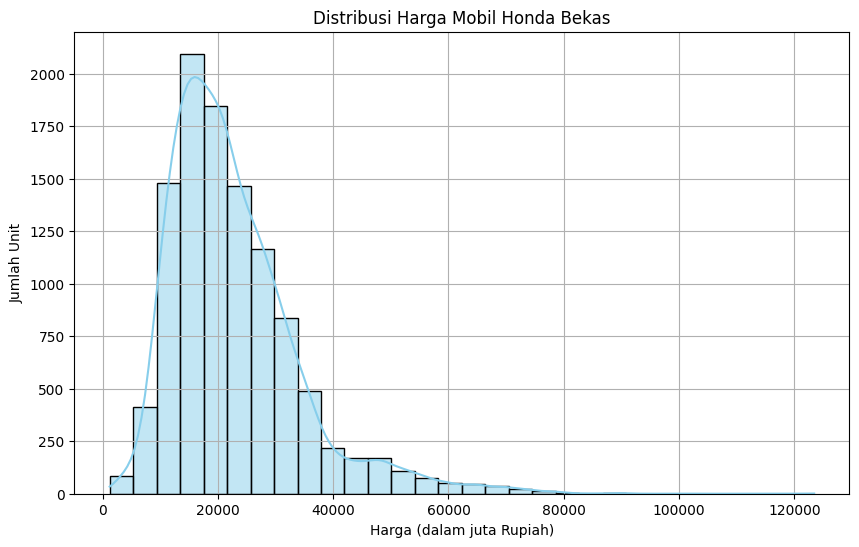

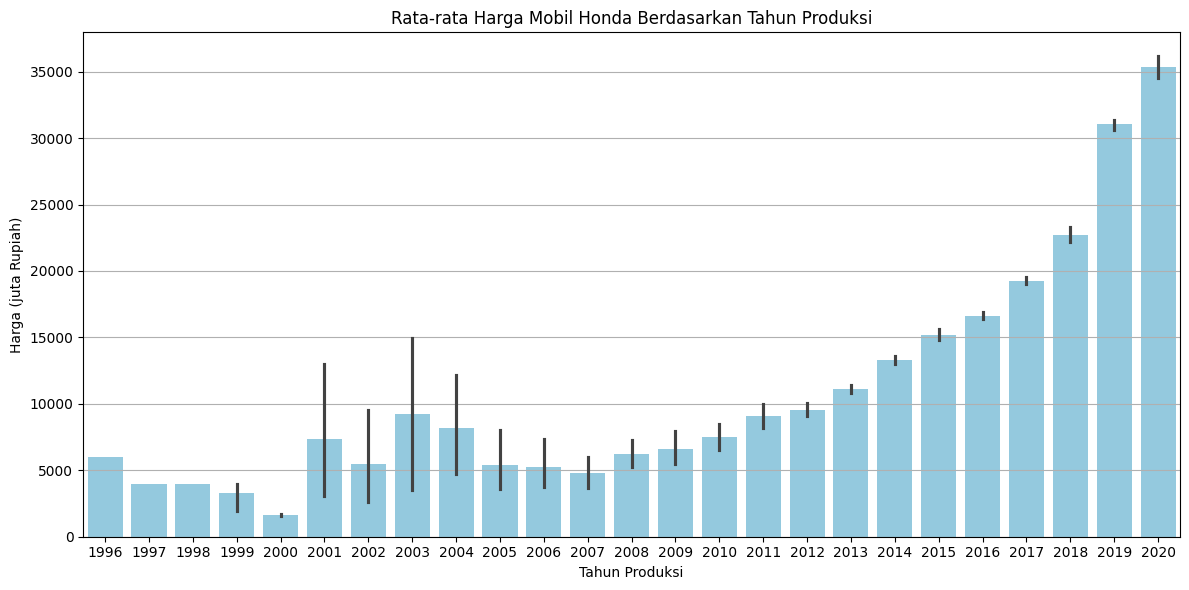

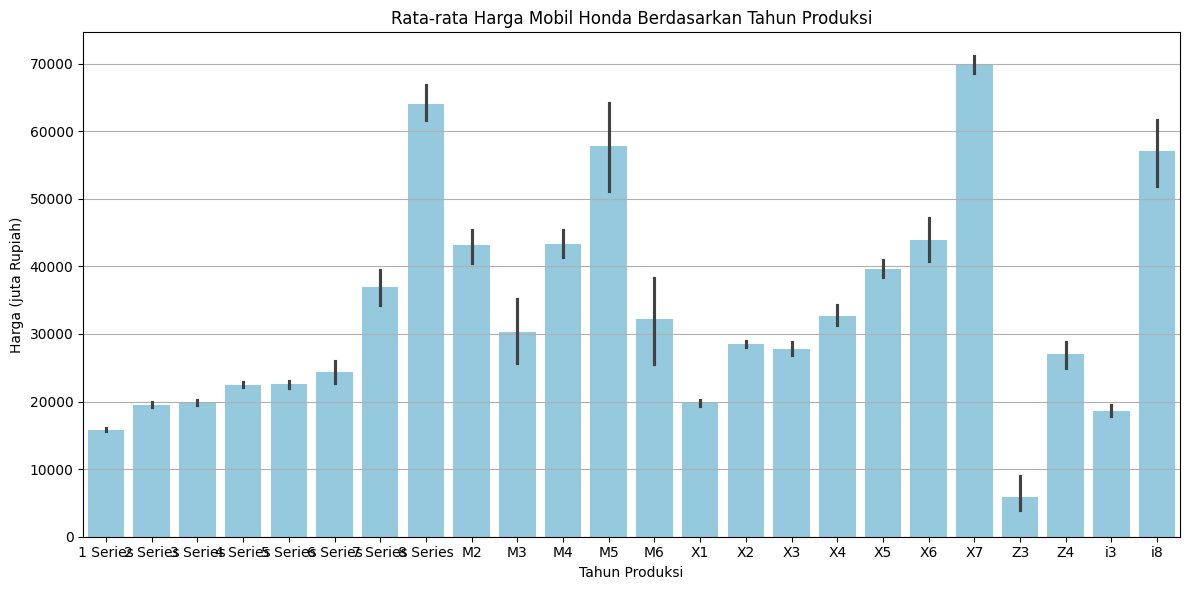

In [303]:
# Tampilkan struktur awal (opsional)
print(df.head())

# Cek deskripsi harga (opsional)
print(df['price'].describe())

# Plot distribusi harga
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Mobil Honda Bekas')
plt.xlabel('Harga (dalam juta Rupiah)')
plt.ylabel('Jumlah Unit')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='year', y='price', data=df, color='skyblue')
plt.title('Rata-rata Harga Mobil Honda Berdasarkan Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (juta Rupiah)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='model', y='price', data=df, color='skyblue')
plt.title('Rata-rata Harga Mobil Honda Berdasarkan Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (juta Rupiah)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


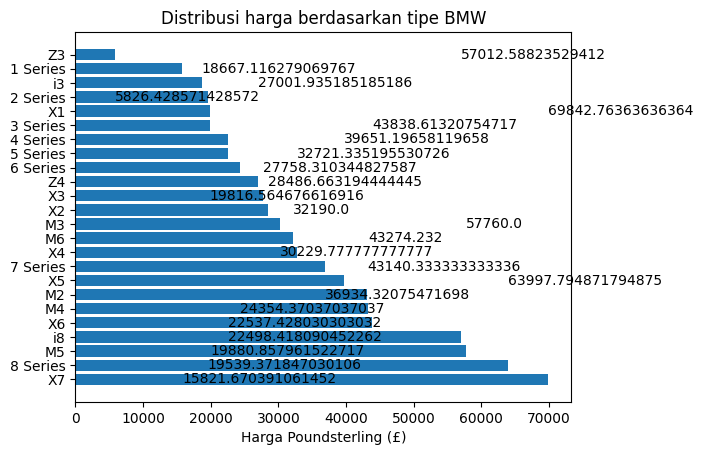

In [ ]:
barchart = df.groupby('model', as_index=False)['price'].mean().sort_values('price', ascending=False)
harga=df['price']
plt.barh(y=barchart.model, width=barchart.price)
for i in range(len(barchart)):
    plt.text(barchart.price[i] + 0.5, i, str(barchart.price[i]), va='center')
plt.title('Distribusi harga berdasarkan tipe BMW')
plt.xlabel('Harga Poundsterling (£)')
plt.show()